IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

GUERASSIMOV Alexandre - QIAN Christian

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Compléter le nom de ce notebook en rajoutant les noms des membres du binômes séparés par un tiret.

## Préparation


Décompresser l'archive, elle crée le répertoire "tme8" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

## Visualisation des données

Lorsque les données sur lesquelles on travaille possèdent plus de 2 dimensions, il est impossible de les visualiser simplement comme on a pu le faire dans les séances précédentes.

Une façon de mieux visualiser ces données et alors d'utiliser les outils d'un package de visualisation.

Le package <code>seaborn</code> est très pratique (vous pouvez consulter la documentation sur le web) et généralement installé dans l'environnement Python.

Nous utilisons ici la fonction <code>pairplot</code> de ce package. Cette fonction permet d'afficher les corrélations des dimensions prises 2 à 2.




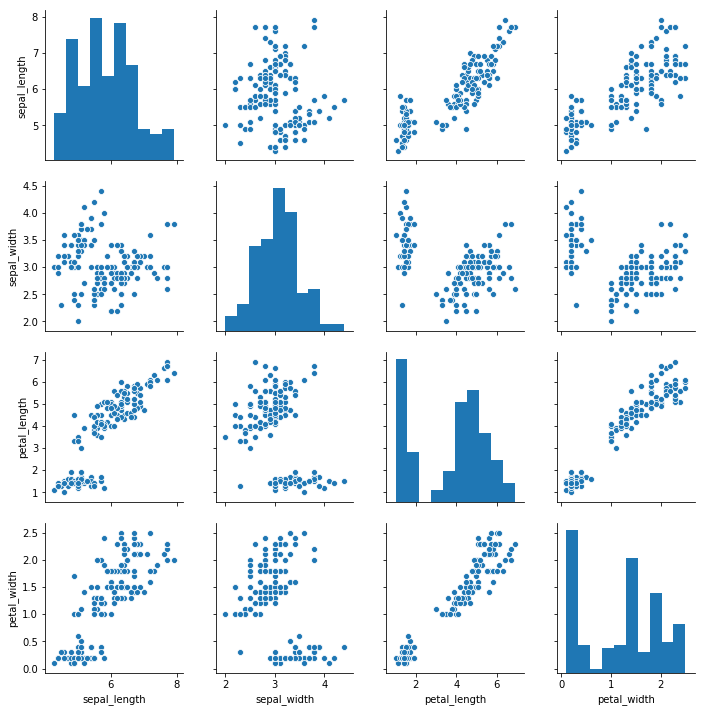

In [2]:
# Importation du package seaborn:
import seaborn as sns


# On créé un dataframe df. 
# Par exemple :
df = sns.load_dataset('iris')

# on utilise ici une fonction particulière de seaborn pour charger les données des Iris de Fischer


# A partir de df, on construit l'ensemble des corrélations des dimensions prises 2 à 2:
sns.pairplot(df)

# Eventuellement, mais pas nécessairement utile:
#sns.plt.show()


### Chargement du fichier "base_2D.csv"

In [3]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


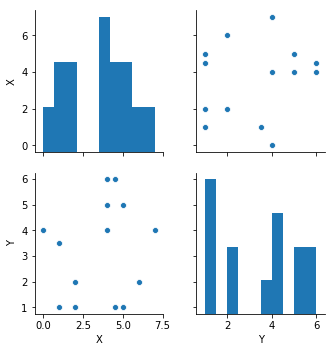

In [4]:
# Affichage des corrélations:
sns.pairplot(data_2D)


Dans la suite, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Mise à jour de votre librairie IADS

<font color="RED" size="+1">**[Q]**</font> Dans un premier temps, rajoutez les fonctions écrites lors de la séance précédentes dans le fichier <code>kmoyennes.py</code> qui sera placé dans le répertoire <code>iads</code> de votre package de fonction 3i026. (pour mémoire, vous pouvez retourner voir le sujet des séances 3 à 5).


Pour cela, reprenez le fichier <code>kmoyennes.py</code> qui se trouve dans le répertoire <code>tme09</code> de cette séance, placez le dans le répertoire <code>iads</code> et complétez-le en reprenant les fonctions que vous avez écrites dans la séance précédente.



Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en l'important:

In [6]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
# importation de utils
from iads import kmoyennes as km


## Travail à réaliser

<font color="RED" size="+1">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> avec les données jouets de <code>data_2D</code> (une fois normalisées).

iteration  1  Inertie :  0.7812585034013606  Difference: 0.005340136054421851


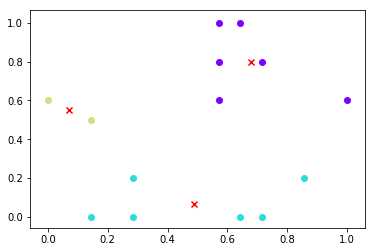

In [7]:
# Normalisation:
data_2Dnorm = km.normalisation(data_2D)

# Essai avec k=3:
les_centres, l_affectation = km.kmoyennes(3, data_2Dnorm, 0.05, 100)

# Affichage du résultat:
km.affiche_resultat(data_2Dnorm,les_centres,l_affectation)

Utiliser les fonctions écrites dans les séances sur l'apprentissage supervisé (<code>createGaussianDataset</code>) pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

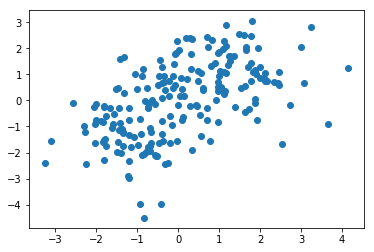

In [32]:
# Utilisation de cette fonction :
the_set = ut.createGaussianDataset(np.array([1,1]) ,np.array([[1,0],[0,1]]), \
                                   np.array([-1,-1]),np.array([[1,0],[0,1]]), 100)

# Transformation du labeledSet en DataFrame: (on sait qu'il n'y a que 2 dimensions)
les_X0 = []
les_X1 = []
for i in range(0,the_set.size()):
    les_X0.append(the_set.getX(i)[0])
    les_X1.append(the_set.getX(i)[1])

# Affichage des points obtenus
data_random = pd.DataFrame({'X':les_X0, 'Y':les_X1})
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

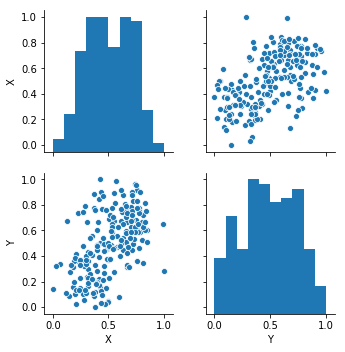

In [9]:
# Affichage des corrélations:

sns.pairplot(DataRandom)


<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

iteration  1  Inertie :  7.418902314234236  Difference: 0.5620798668607376
iteration  2  Inertie :  8.058988029707333  Difference: 0.6400857154730968
iteration  3  Inertie :  9.021946659289943  Difference: 0.9629586295826105
iteration  4  Inertie :  7.030432914261171  Difference: 1.9915137450287723
iteration  5  Inertie :  7.890457748084189  Difference: 0.8600248338230179
iteration  6  Inertie :  7.6216506384224205  Difference: 0.26880710966176835
iteration  7  Inertie :  11.029103184652124  Difference: 3.4074525462297034
iteration  8  Inertie :  7.182091025316517  Difference: 3.8470121593356073
iteration  9  Inertie :  7.530291141172072  Difference: 0.34820011585555566
iteration  10  Inertie :  6.429879994539023  Difference: 1.100411146633049
iteration  11  Inertie :  7.168006659816925  Difference: 0.7381266652779015
iteration  12  Inertie :  7.418463009076136  Difference: 0.25045634925921156
iteration  13  Inertie :  7.605931887650034  Difference: 0.18746887857389805
iteration  14  I

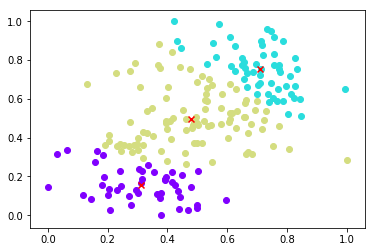

In [10]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration  1  Inertie :  11.860211516476793  Difference: 1.1379616236642605
iteration  2  Inertie :  8.700674874480482  Difference: 3.1595366419963113
iteration  3  Inertie :  10.424027866080593  Difference: 1.7233529916001107
iteration  4  Inertie :  9.038523575042548  Difference: 1.3855042910380444
iteration  5  Inertie :  9.393917967294215  Difference: 0.35539439225166625
iteration  6  Inertie :  8.89925043089228  Difference: 0.49466753640193417
iteration  7  Inertie :  17.320486761050837  Difference: 8.421236330158557
iteration  8  Inertie :  11.752631308805322  Difference: 5.5678554522455155
iteration  9  Inertie :  11.917733126167203  Difference: 0.16510181736188123
iteration  10  Inertie :  14.36008031243961  Difference: 2.442347186272407
iteration  11  Inertie :  8.533779299235317  Difference: 5.826301013204294
iteration  12  Inertie :  8.973086782964668  Difference: 0.43930748372935113
iteration  13  Inertie :  9.773953057633353  Difference: 0.8008662746686852
iteration  14  I

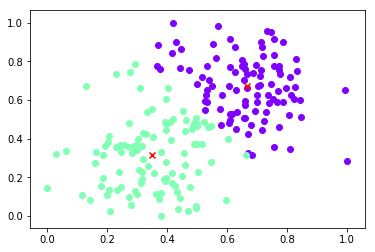

In [12]:
les_centresRand1, l_affectationv = km.kmoyennes(2, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationv)

iteration  1  Inertie :  3.8524983951532157  Difference: 0.31525269930540833
iteration  2  Inertie :  3.7605793271956607  Difference: 0.091919067957555
iteration  3  Inertie :  3.737507084366089  Difference: 0.023072242829571543


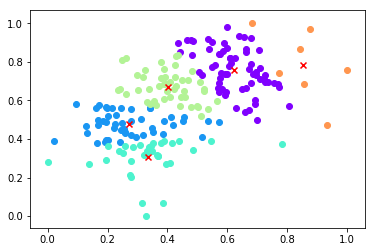

In [34]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration  1  Inertie :  3.0386698764307813  Difference: 0.29584170876148486
iteration  2  Inertie :  3.323862796028763  Difference: 0.28519291959798165
iteration  3  Inertie :  4.197022943196824  Difference: 0.8731601471680612
iteration  4  Inertie :  4.0867208446752405  Difference: 0.11030209852158368
iteration  5  Inertie :  3.4324276295161598  Difference: 0.6542932151590808
iteration  6  Inertie :  3.0836796124552532  Difference: 0.3487480170609065
iteration  7  Inertie :  3.7125381808902063  Difference: 0.628858568434953
iteration  8  Inertie :  3.80623608686114  Difference: 0.09369790597093353
iteration  9  Inertie :  2.7755320313684084  Difference: 1.0307040554927314
iteration  10  Inertie :  2.890881009323756  Difference: 0.11534897795534738
iteration  11  Inertie :  3.093870192227306  Difference: 0.20298918290355017
iteration  12  Inertie :  4.838299274277876  Difference: 1.7444290820505701
iteration  13  Inertie :  3.6424197203246336  Difference: 1.1958795539532425
iteration 

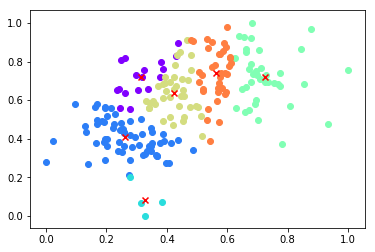

In [35]:
les_centresRand2, l_affectationRand2 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand2,l_affectationRand2)

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [15]:
def dist_intracluster(E):
    dk = 0
    for e1 in E.values:
        for e2 in E.values:
            if (e1 == e2).all():
                continue
            d = km.dist_vect(e1,e2)
            dk = d if d > dk else dk
    return dk

In [16]:
# Exemple avec les données précédentes: 
for k in range(0,len(l_affectationRand1)):
    DF = DataRandom.iloc[l_affectationRand1[k]]
    print('cluster' + str(k)+": inertie = " + str(km.inertie_cluster(DF)) + "\tintra = "+  str(dist_intracluster(DF)))


cluster0: inertie = 0.6339318491392958	intra = 0.48842982106399757
cluster1: inertie = 0.033185549662442776	intra = 0.23094847024729065
cluster2: inertie = 0.5345169922667896	intra = 0.4629486473030116
cluster3: inertie = 1.186732176703343	intra = 0.6208253166275685
cluster4: inertie = 2.7950364884140684	intra = 0.6056893313764443


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [17]:
def global_intraclusters(Base, Affect):
    res = 0
    for k in Affect.keys():
        cd = Base.iloc[Affect[k], :]
        d = dist_intracluster(cd)
        res = d if d > res else res
    return res

In [18]:
# Exemples:
print("Données jouet: "+str(global_intraclusters(data_2Dnorm,l_affectation)))
print("Données aléatoire: "+str(global_intraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertie_globale(data_2Dnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertie_globale(DataRandom,l_affectationRand2)))


Données jouet: 0.7417574277569811
Données aléatoire: 0.6206213444771277
Avec l'inertie :
Données jouet: 0.7812585034013606
Données aléatoire: 4.047321779084358


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [19]:
def sep_clusters(Centres):
    res = km.dist_vect(Centres.values[0],Centres.values[1])
    for c1 in Centres.values:
        for c2 in Centres.values:
            if (c1 == c2).all():
                continue
            d = km.dist_vect(c1,c2)
            res = d if d < res else res
    return res

In [20]:
# Avec les données jouet:
print("Séparabilité: "+str(sep_clusters(les_centres)))


Séparabilité: 0.638139657302555


In [21]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sep_clusters(les_centresRand2)))


Séparabilité: 0.2498231373686265


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [22]:
def evaluation(s, Base, Centres, Affect):
    if s == "Dunn":
        return global_intraclusters(Base, Affect) / sep_clusters(Centres)
    elif s == "XB":
        return km.inertie_globale(Base, Affect) / sep_clusters(Centres)

In [36]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",data_2Dnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",data_2Dnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand2,l_affectationRand2)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand2,l_affectationRand2)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand1,l_affectationRand1)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand1,l_affectationRand1)))


Pour les données jouet:
	Dunn:	1.162374754912464
	XB:	1.2242751166786523
Pour les données aléatoires (6 clusters):
	Dunn:	4.64500261821964
	XB:	26.220388954829907
Pour les données aléatoires (5 clusters):
	Dunn:	4.235016154922176
	XB:	20.093483869043332


<font size="+1" color="RED">**[Q]**</font> Afficher le résultat de chaque clustering sur les données en indiquant les valeurs des indices de Dunn et de Xie & Beni. Quelles conclusions pouvez-vous en tirer?

On sait que plus la valeur d'un index est faible, meilleur est le clustering. 

## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

In [27]:
def deterK(s,X):
    ev = 1000000
    k = 2
    ind=[]
    x=list(range(2,11))
    for i in x:
        cent, aff = km.kmoyennes(i, X, 0.05, 100)
        tmp = evaluation(s, X, cent, aff)
        if ev > tmp:
            ev = tmp
            k = i
        ind.append(tmp)
    plt.plot(x,ind)
    plt.show()
    return k

iteration  1  Inertie :  1.8025668934240362  Difference: 0.20588662131519309
iteration  2  Inertie :  2.0417052154195012  Difference: 0.23913832199546503
iteration  3  Inertie :  1.8192142857142857  Difference: 0.22249092970521556
iteration  4  Inertie :  1.427942176870748  Difference: 0.3912721088435376
iteration  5  Inertie :  1.6188338192419824  Difference: 0.19089164237123435
iteration  6  Inertie :  1.4718950437317786  Difference: 0.14693877551020385
iteration  7  Inertie :  1.392091836734694  Difference: 0.07980320699708465
iteration  8  Inertie :  1.427942176870748  Difference: 0.03585034013605415
iteration  1  Inertie :  0.9323935860058309  Difference: 0.22252380952380946
iteration  2  Inertie :  1.0529421768707483  Difference: 0.12054859086491743
iteration  3  Inertie :  1.2567857142857144  Difference: 0.20384353741496608
iteration  4  Inertie :  1.0558483965014576  Difference: 0.20093731778425683
iteration  5  Inertie :  0.8127244897959183  Difference: 0.2431239067055393
iter

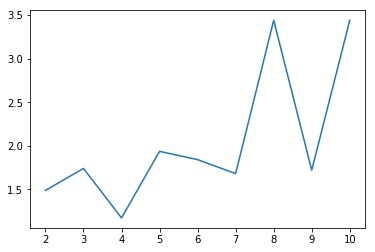

4

In [28]:
deterK("Dunn",data_2Dnorm)

iteration  1  Inertie :  1.4718950437317786  Difference: 0.7822727567217362
iteration  2  Inertie :  1.4718950437317786  Difference: 0.0
iteration  1  Inertie :  1.340940233236152  Difference: 0.4085466472303211
iteration  2  Inertie :  0.7199251700680273  Difference: 0.6210150631681247
iteration  3  Inertie :  0.7199251700680271  Difference: 1.1102230246251565e-16
iteration  1  Inertie :  0.8790330417881438  Difference: 0.16795140913508255
iteration  2  Inertie :  0.6087517006802721  Difference: 0.2702813411078717
iteration  3  Inertie :  0.672  Difference: 0.06324829931972797
iteration  4  Inertie :  0.9799198250728864  Difference: 0.3079198250728864
iteration  5  Inertie :  1.020248299319728  Difference: 0.040328474246841495
iteration  1  Inertie :  0.46205102040816337  Difference: 0.19109863945578237
iteration  2  Inertie :  0.5208333333333334  Difference: 0.05878231292517
iteration  3  Inertie :  0.4732823129251701  Difference: 0.04755102040816328
iteration  1  Inertie :  0.268564

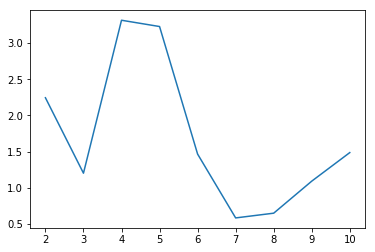

7

In [29]:
deterK("XB",data_2Dnorm)

## Préparation pour le projet

Le temps restant de la séance est consacré au projet.

